# <center>Trabajo Práctico N°1 : Reservas de Hotel</center>

**Grupo:** N°28 - The Kingdom

**Alumnos**:


*   Jurgens, Cecilia Ines
*   Schipani, Martin Sebastian
*   Soto, Marilyn Nicole

**Corrector:** Franco Mastelli

---


# **Analisis Exploratorio y Preprocesamiento de Datos**

##**Analisis Exploratorio del dataset**

Importamos las librerias correspondientes a utilizar en el proyecto.

In [459]:
import numpy as np
import pandas as pd
import joblib
from os.path import exists
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Cargamos la información a un dataframe de pandas, luego creamos una copia y trabajamos con ella.

In [460]:
ds_hotel_original = pd.read_csv('hotels_train.csv')
df_hotels = ds_hotel_original.copy()

Mostramos las primeras cinco filas del dataset

In [461]:
df_hotels.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Mostramos las ultimas cinco filas del dataset

In [462]:
df_hotels.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,NaN,153.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,143.29,0,0,7137e599-4442-41fb-b147-4aba9f344e38,1


## <u>Análisis del dataset</u>

Muestra la cantidad de filas y columnas que tiene el dataset

In [463]:
print("El dataframe tiene "f"{df_hotels.shape[0]}"" filas y "f"{df_hotels.shape[1]}"" columnas.")

El dataframe tiene 61913 filas y 31 columnas.


Obtengo los nombres de las columnas/categorias del dataset y sus tipos de variables.

Chequeamos si existe alguna fila duplicada:

In [464]:
df_hotels[df_hotels.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No hay ninguna fila duplicada. Si hubiera existido, se habria eliminado del dataset.

Listar la cantidad de datos no nulos:

## <u>Analisis Univariado:</u>

###<u>Variables Cualitativas:</u>

#### Country

In [465]:
df_hotels.country.isna().sum()

221

Existen 221 valores nulos de la variable en el dataset. Analizemos el porcentaje de ellos.

In [466]:
(df_hotels.country.isna().sum()*100)/df_hotels.shape[0]

0.3569524978599002

Son pocos los valores nulos en comparacion de todos los registros. Completamos en esos campos nulos con la mas frecuente.

In [467]:
df_hotels.loc[df_hotels['country'].isnull(), 'country'] = 'PRT'


In [468]:
df_hotels.country.isna().sum()

0

#### agent

In [469]:
df_hotels.agent.isna().sum()

7890

Existen 7890 valores nulos de esta variable en el dataset. Como no existe el agent 0 previamente reemplazamos los valores faltantes por 0.

In [470]:
df_hotels.loc[df_hotels['agent'].isnull(), 'agent'] = 0
df_hotels.agent.isna().sum()
df_hotels['agent'] = df_hotels['agent'].astype(int)

In [471]:
df_hotels.agent.isna().sum()

0

#### company


In [472]:
df_hotels.company.isna().sum()

58761

Existen 58761 valores nulos de esta variable en el dataset. Se analizarán más adelante su tratamiento de los datos faltantes. Como son muchos los datos faltantes y la informacion que releva no es tan primordial para la prediccion del target, decidimos eliminar esta columna del dataset.

In [473]:
df_hotels.drop('company', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


###<u>Variables Cuantitativas:</u>

#### adults

In [474]:
df_hotels.adults.isna().sum()

0

In [475]:
df_hotels.drop(df_hotels[df_hotels['adults']==0].index, axis='index', inplace=True)
df_hotels.drop(df_hotels[df_hotels['adults'] > 3].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61670,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61671,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61672,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61673,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### adr

Veamos si hay filas que contienen valores incorrectos / nulos

In [476]:
df_hotels.adr.isna().sum()

0

In [477]:
(df_hotels['adr'] >= 0).value_counts()

True     61674
False        1
Name: adr, dtype: int64

Hay un valor que no es válido:. No puede haber ganacia negativa.  Eliminamos esa fila.

In [478]:
df_hotels.drop(df_hotels[df_hotels['adr']<=0].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


In [479]:
media_adr = np.mean(df_hotels.adr)
std_adr = np.std(df_hotels.adr)
df_hotels['z_adr'] = (df_hotels.adr - media_adr)/std_adr
df_hotels['z_adr'] = st.zscore(df_hotels.adr)

Como el porcentaje es minimo , eliminamos las filas de esos valores raros

In [480]:
df_hotels.drop(df_hotels[df_hotels['adr']>=400].index, axis='index', inplace=True)

In [481]:
df_hotels.drop(df_hotels[df_hotels['z_adr']>3].index, axis='index', inplace=True)
df_hotels.drop(df_hotels[df_hotels['z_adr']<-2].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,0.250695
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,-1.332919
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2.696140
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,-0.621908
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,-0.621908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,-1.203644
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,0.972479
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,-0.190993
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,-1.461116


In [482]:
df_hotels.drop(labels='z_adr', inplace= True, axis=1)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59917,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59918,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59919,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59920,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### babies

In [483]:
df_hotels.drop(df_hotels[df_hotels['babies']>=9].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59916,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59917,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59918,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59919,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### Lead_time

Como el porcentaje es mínimo , eliminamos las filas de esos valores raros

In [484]:
#df_hotels.drop(df_hotels[df_hotels['lead_time']>=400].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### children

In [485]:
df_hotels.children.isna().sum()

4

In [486]:
df_hotels.loc[df_hotels['children'].isnull(), 'children'] = 0

In [487]:
df_hotels.loc[df_hotels["children"] < 0, "children" ] = 0


In [488]:
df_hotels.drop(df_hotels[df_hotels['children']>=10].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59915,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59916,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59917,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59918,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### previous_cancellations

Analizamos la informacion de la variable previous_cancellations

In [489]:
df_hotels.drop(df_hotels[df_hotels['previous_cancellations']>=2].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59699,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59700,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59701,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59702,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### previous_bookings_not_cancelled

In [490]:
df_hotels.drop('previous_bookings_not_canceled', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### days_in_waiting_list

In [491]:
#df_hotels.drop(df_hotels[df_hotels['days_in_waiting_list']>=250].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### required_car_parking_spaces



In [492]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 3), 'required_car_parking_spaces'] = 2


In [493]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 8), 'required_car_parking_spaces'] = 2

#### total_of_special_requests

In [494]:
df_hotels.loc[(df_hotels['total_of_special_requests'] >= 4), 'total_of_special_requests'] = 1


In [495]:
df_hotels.total_of_special_requests.value_counts().reset_index()

,index,total_of_special_requests
0,0,37375
1,1,15281
2,2,5936
3,3,1112


## Analisis Multivariado:

### Correlacion entre Variables:

Para medir el nivel de correlacion entre las variables se utilizo el coeficiente de pearson y lo muestro a traves de un grafico heatmap.

In [496]:
df_hotels['total_days'] = df_hotels['stays_in_week_nights'] + df_hotels['stays_in_weekend_nights']

In [497]:
#df_hotels.drop(df_hotels[df_hotels['total_days'] >= 15].index, inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59699,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,2
59700,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,1
59701,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,3
59702,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,7


In [498]:
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'K') & (df_hotels['adr'] > 160)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'I') & (df_hotels['adr'] > 210)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'B') & (df_hotels['adr'] > 160)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'B') & (df_hotels['adr'] < 30)].index, inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59635,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,2
59636,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,1
59637,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,3
59638,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,7


#**Transformacion de datos para el modelo**

###Importamos todo lo necesario para esta seccion

In [499]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_curve
from sklearn.utils.extmath import randomized_range_finder
from sklearn.metrics.cluster import mutual_info_score

###Cargamos el dataset de testeo

In [500]:
df_hotels_testeo_original = pd.read_csv('hotels_test.csv')
df_hotels_testeo = df_hotels_testeo_original.copy()

###Cargamos nuestro dataset del checkpoint anterior

In [501]:
df_hotels_arbol = df_hotels.copy()
print(f'tenememos {df_hotels_arbol.shape[0]} filas y {df_hotels_arbol.shape[1]} columnas ')

tenememos 59640 filas y 30 columnas 


In [502]:
df_hotels_arbol.isna().sum().max()

0

df_hotels_arbol.loc[df_hotels_arbol[

###informacion del dataframe arbol

In [503]:
df_hotels_testeo.fillna({'agent': 0}, inplace=True)

In [504]:
df_hotels_testeo.isna().sum().max()

25218

In [505]:
df_hotels_arbol.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,7


In [506]:
df_hotels_arbol.isnull().sum().max()

0

###Transformacion de las columnas

In [507]:
df_hotels_arbol.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled',
 'total_days']

In [508]:
df_hotels_testeo.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id']

In [509]:
df_hotels_arbol.drop('assigned_room_type', axis=1, inplace=True)

In [510]:
df_hotels_testeo.drop('assigned_room_type', axis=1, inplace=True)

In [511]:
meses_a_numeros ={
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July':7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df_hotels_arbol.arrival_date_month = df_hotels_arbol.arrival_date_month.map(meses_a_numeros)

In [512]:
meses_a_numeros ={
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July':7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df_hotels_testeo.arrival_date_month = df_hotels_testeo.arrival_date_month.map(meses_a_numeros)


In [513]:
rooms_arbol = df_hotels_arbol.reserved_room_type.unique().tolist()
rooms_testeo = df_hotels_testeo.reserved_room_type.unique().tolist()
rooms_arbol_testeo = set(rooms_arbol).difference(set(rooms_testeo))
rooms_testeo_arbol = set(rooms_testeo).difference(set(rooms_arbol))
dif_rooms_testeo_arbol = {x:'A'for x in rooms_testeo_arbol}
dif_rooms_arbol_testeo = {x:'A'for x in rooms_arbol_testeo}
df_hotels_arbol['reserved_room_type'].replace(dif_rooms_arbol_testeo, inplace=True)
df_hotels_testeo['reserved_room_type'].replace(dif_rooms_testeo_arbol, inplace=True)

In [514]:
dormitorio_letra_a_numero ={
      'A': 1,
      'B': 2,
      'C': 3,
      'D': 4,
      'E': 5,
      'F': 6,
      'G': 7,
      'H': 8,
      'I': 9,
      'K': 10,
      'L': 11,
      'P': 12
}
df_hotels_arbol.reserved_room_type = df_hotels_arbol.reserved_room_type.map(dormitorio_letra_a_numero)


In [515]:
dormitorio_letra_a_numero ={
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 10,
    'L': 11,
    'P': 12
}
df_hotels_testeo.reserved_room_type = df_hotels_testeo.reserved_room_type.map(dormitorio_letra_a_numero)

In [516]:
dc_arbol = df_hotels_arbol.distribution_channel.unique().tolist()
dc_testeo = df_hotels_testeo.distribution_channel.unique().tolist()
dc_arbol_testeo = set(dc_arbol).difference(set(dc_testeo))
dc_testeo_arbol = set(dc_testeo).difference(set(dc_arbol))
dif_dc_testeo_arbol = {x:'TA/TO'for x in dc_testeo_arbol}
dif_dc_arbol_testeo = {x:'TA/TO'for x in dc_arbol_testeo}
df_hotels_arbol['distribution_channel'].replace(dif_dc_arbol_testeo, inplace=True)
df_hotels_testeo['distribution_channel'].replace(dif_dc_testeo_arbol, inplace=True)

In [517]:
#country_arbol = df_hotels_arbol.country.unique().tolist()
#country_testeo = df_hotels_testeo.country.unique().tolist()
#country_arbol_testeo = set(country_arbol).difference(set(country_testeo))
#country_testeo_arbol = set(country_testeo).difference(set(country_arbol))
#dif_country_testeo_arbol = {x:'PRT'for x in country_testeo_arbol}
#dif_country_arbol_testeo = {x:'PRT'for x in country_arbol_testeo}
#df_hotels_arbol['country'].replace(dif_country_arbol_testeo, inplace=True)
#df_hotels_testeo['country'].replace(dif_country_testeo_arbol, inplace=True)

In [518]:
country_top_arbol= df_hotels_arbol['country'].value_counts()
top_5_country_arbol = country_top_arbol.head(20).index.tolist()
df_hotels_arbol['country'] = df_hotels_arbol['country'].apply(lambda x: x if x in top_5_country_arbol else 'other')

In [519]:
df_hotels_testeo['country'] = df_hotels_testeo['country'].apply(lambda x: x if x in top_5_country_arbol else 'other')

In [520]:
market_arbol = df_hotels_arbol.market_segment.unique().tolist()
market_testeo = df_hotels_testeo.market_segment.unique().tolist()
market_arbol_testeo = set(market_arbol).difference(set(market_testeo))
market_testeo_arbol = set(market_testeo).difference(set(market_arbol))
dif_market_testeo_arbol = {x:'Online TA'for x in market_testeo_arbol}
dif_market_arbol_testeo = {x:'Online TA'for x in market_arbol_testeo}
df_hotels_arbol['market_segment'].replace(dif_market_arbol_testeo, inplace=True)
df_hotels_testeo['market_segment'].replace(dif_market_testeo_arbol, inplace=True)

In [521]:
df_hotels_arbol.drop('id', axis= 1, inplace=True)

In [522]:
df_hotels_testeo.drop('id', axis= 1, inplace=True)

In [523]:
#COMPANY
df_hotels_testeo.drop('company', axis='columns', inplace=True)

#AGENT
df_hotels_testeo.loc[df_hotels_testeo['agent'].isnull(), 'agent'] = 0
df_hotels_testeo['agent'] = df_hotels_testeo['agent'].astype(int)

#COUNTRY
##Reemplazamos los valores nulos con la moda
df_hotels_testeo.loc[df_hotels_testeo['country'].isnull(), 'country'] = 'PRT'

#CHILDREN
##Eliminacion de los registros con datos nulos de esta variable:
df_hotels_testeo.loc[df_hotels_testeo['children']< 0, 'children'] =0
df_hotels_testeo['children'] = df_hotels_testeo['children'].astype(int)

#PREVIOUS_BOOKINGS_NOT_CANCELED
df_hotels_testeo.drop('previous_bookings_not_canceled', axis='columns', inplace=True)

#STAYS_IN_WEEKEND_NIGHTS vs STAYS_IN_WEEK_NIGHTS
df_hotels_testeo['total_days'] = df_hotels_testeo['stays_in_week_nights'] + df_hotels_testeo['stays_in_weekend_nights']


In [524]:
columns_modificar_arbol = df_hotels_arbol.dtypes[(df_hotels_arbol.dtypes !='int64') & (df_hotels_arbol.dtypes !='float64')].index
columns_modificar_arbol = columns_modificar_arbol.tolist()
columns_modificar_arbol

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

In [525]:
columns_modificar_testeo = df_hotels_testeo.dtypes[(df_hotels_testeo.dtypes !='int64') & (df_hotels_testeo.dtypes !='float64')].index
columns_modificar_testeo = columns_modificar_testeo.tolist()
columns_modificar_testeo

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

####One hot encoding para variables categoricas para el dtaset de testeo

In [526]:
df_hotels_arbol = pd.get_dummies(df_hotels_arbol, columns=columns_modificar_arbol, drop_first=True)
df_hotels_arbol.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,49,2016,9,37,5,1,2,1,0.0,0,...,0,1,0,0,1,0,0,0,1,0
1,4,2015,10,44,31,0,1,2,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,2016,10,42,13,0,1,2,2.0,0,...,0,1,0,0,1,0,0,0,1,0
3,26,2016,12,51,12,2,5,2,0.0,0,...,0,0,0,0,1,1,0,0,1,0
4,104,2017,3,12,19,2,5,2,0.0,0,...,1,0,0,0,1,0,0,0,0,1


In [527]:
df_hotels_testeo = pd.get_dummies(df_hotels_testeo, columns=columns_modificar_testeo, drop_first=True)
df_hotels_testeo.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,11,46,7,1,2,2,0,0,...,0,0,0,0,1,1,0,0,1,0
1,286,2016,5,20,11,0,4,2,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2016,8,35,23,0,1,3,0,0,...,0,1,0,0,1,0,0,0,1,0
3,196,2016,10,44,29,2,5,2,2,0,...,0,1,0,0,1,0,0,0,1,0
4,232,2016,11,48,26,2,1,2,0,0,...,0,0,0,0,1,1,0,0,1,0


In [528]:
faltan_columnas = list(sorted(set(df_hotels_testeo.columns)- set(df_hotels_arbol.columns)))
agregar_columnas = list(sorted(set(df_hotels_arbol.columns)- set(df_hotels_testeo.columns)))

print(faltan_columnas)
print(agregar_columnas)

[]
['is_canceled']


In [529]:
df_hotels_testeo.isna().sum().max()

0

In [530]:
df_hotels_arbol.isna().sum().max()

0

#**Entrenamiento**

In [531]:
ds_trabajo_x = df_hotels_arbol.drop(["is_canceled"], axis='columns', inplace=False)
ds_trabajo_y = df_hotels_arbol['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size = 0.15, random_state = 28)

In [532]:
x_train.head(2)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
9256,241,2015,10,43,19,1,2,2,0.0,0,...,0,0,0,0,1,0,0,0,0,1
5489,0,2015,11,48,25,0,1,1,0.0,0,...,0,0,1,0,0,0,0,0,1,0


In [533]:
x_test.head(2)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
47844,87,2017,4,15,15,2,2,2,0.0,0,...,0,0,0,0,1,1,0,0,1,0
40943,178,2017,8,33,18,2,5,3,0.0,0,...,1,0,0,0,1,0,0,0,0,0


In [534]:
y_train.head(2)

9256    0
5489    0
Name: is_canceled, dtype: int64

In [535]:
y_test.head(2)

47844    1
40943    0
Name: is_canceled, dtype: int64

#**Stacking**

In [536]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [537]:
if not exists('stacking.joblib'):
  tree_clf = tree.DecisionTreeClassifier(min_samples_split=34, min_samples_leaf= 7, max_depth= 25, criterion= 'gini', ccp_alpha= 0.0001)
  xgboost_clf = xgb.XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=100, colsample_bytree=0.8, gamma=0.1, objective='binary:logistic', random_state=42)
  rf_clf = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 90)

  base_models = [('tree', tree_clf), ('xgb', xgboost_clf), ('rf', rf_clf)]

  meta_model = RandomForestClassifier(criterion= 'entropy',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 100)

  stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True,cv=5,verbose=2)
  joblib.dump(stacking_model, 'stacking.joblib')

In [538]:
stacking_model = joblib.load('stacking.joblib')

In [539]:
stacking_model.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('tree',
                                DecisionTreeClassifier(ccp_alpha=0.0001,
                                                       max_depth=25,
                                                       min_samples_leaf=7,
                                                       min_samples_split=34)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None...
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       min_samples_split=5,
                                                       n_estimators=90))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          min_samples_split=5),
                   passthrough=True, verbose=2)

In [540]:
y_pred_st = stacking_model.predict(x_test)
accuracy_score(y_test, y_pred_st)

0.8830762351889112

Text(50.722222222222214, 0.5, 'True')

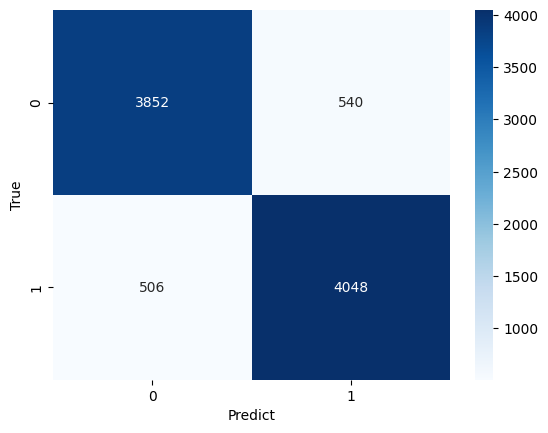

In [541]:
tabla=confusion_matrix(y_test, y_pred_st)
sns.heatmap(tabla, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predict')
plt.ylabel('True')

In [542]:
accuracySt= accuracy_score(y_test, y_pred_st)
recallSt = recall_score(y_test, y_pred_st)
f1St = f1_score(y_test, y_pred_st)
precisionSt = precision_score(y_test, y_pred_st)

print('Accuracy: ' + str(accuracySt))
print('Recall: ' + str(recallSt))
print('f1: ' + str(f1St))
print('precision: ' + str(precisionSt))

Accuracy: 0.8830762351889112
Recall: 0.8888888888888888
f1: 0.8855830234084444
precision: 0.8823016564952049


In [543]:
y_pred_st = stacking_model.predict(df_hotels_testeo)

In [544]:
df_summision = pd.DataFrame({'id':df_hotels_testeo_original['id'], 'is_canceled': y_pred_st })
df_summision.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [545]:
df_summision.to_csv('submit_hotels_stacking.csv', index=False)